# Анализ рынка заведений общественного питания Москвы

## Описание проекта

В данном проекте был проведен анализ данных о заведениях общественного питания в городе Москва с целью оценки возможных перспектив открытия технологичного кафе с роботизированным персоналом.


**Цель проекта:**

* Провести исследование рынка заведений общественного питания Москвы.

**Задачи:**
1. На основе открытых данных составить выводы и рекомендации о виде будущего заведения, количестве посадочных мест, перспективном районе расположения;
2. Оценить возможность развития сети.

**План работы:**
1. Подготовить данные для анализа, получить внешнюю информацию о территориальном делении города, обработать адреса заведений;
2. Изучить соотношения видов заведений по количеству;
3. Рассмотреть соотношение сетевых и несетевых заведений;
4. Построить диаграмму рассеяния для распределения количества посадочных мест и типа общественного заведения;
5. Выделить топ-10 улиц по количеству объектов общественного питания, а так же найти число улиц с одним объектом, изучить их расположение в городе и закономерности.

**Описание данных**

Таблица `rest_data`:
* _id_ — идентификатор объекта;
* _object_name_ — название объекта общественного питания;
* _chain_ — сетевой ресторан;
* _object_type_ — тип объекта общественного питания;
* _address_ — адрес;
* _number_ — количество посадочных мест.

Таблица `district`:
* _streetname_ — название улицы
* _areaid_ — идентификатор района
* _okrug_ — административный округ
* _area_ — район

Наименования административных округов Москвы:
* _ЦАО_ — Центральный
* _ВАО_ — Восточный
* _ЗАО_ — Западный
* _САО_ — Северный
* _СВАО_ — Северо-Восточный
* _ЮВАО_ — Юго-Восточный
* _ЮАО_ — Южный
* _ЮЗАО_ — Юго-Западный
* _СЗАО_ — Новомосковский
* _ТАО_ — Троицкий

## Подготовка данных

In [2]:
import pandas as pd # импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go
from io import BytesIO
import requests

In [3]:
plt.style.use('seaborn-pastel') # выбор палитры
sns.set_style('whitegrid')
sns.color_palette('pastel')
pd.set_option('display.max_colwidth', None) # отображение всех знаков в строке
colors = ['#ea96a3', '#d1964d', '#a29f46', '#60ae47', '#4a8f4f', '#4dabb3', '#6daee2', '#c4a1ea', '#e88ed1']

In [4]:
rest_data = pd.read_csv('datasets\\rest_data.csv') # смотрим файл о заведениях
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


In [4]:
rest_data.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Основная таблица с данными: есть информация о названии предприятия, его тип, принадлежность к сетевому распространению, адрес и количество посадочных мест; на первый взгляд пропусков нет, тип данных соответствует, необходимо будет разве что откорректировать названия столбцов, проверить дубликаты, явные и неявные.

In [5]:
# файл с внешней информацией об территориальном деление Москвы - данные Мосгаза

spreadsheet_id = '1SOJwGRgWneaGss5aZeT2ZMkYLFas0-X2jwQhayeS9TQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district

,streetname,areaid,okrug,area
0,Выставочный переулок,17.0,ЦАО,Пресненский район
1,улица Гашека,17.0,ЦАО,Пресненский район
2,Большая Никитская улица,17.0,ЦАО,Пресненский район
3,Глубокий переулок,17.0,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17.0,ЦАО,Пресненский район
...,...,...,...,...
4427,село Былово,NaN,ТАО,село Былово
4428,улица 1-й километр Объездной Дороги,NaN,ТАО,Клёновское поселение
4429,Новобутовский проезд,NaN,ЮЗАО,Район Южное Бутово
4430,Новохорошёвский проезд,NaN,СЗАО,Район Хорошево-Мневники


In [6]:
district.info()  # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4432 entries, 0 to 4431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   streetname  4432 non-null   object 
 1   areaid      4398 non-null   float64
 2   okrug       4431 non-null   object 
 3   area        4431 non-null   object 
dtypes: float64(1), object(3)
memory usage: 138.6+ KB


Столбец с areaid нам не понадобится, от него можно избавиться, так же как и от одной строки с пропуском района и адм.округа. В остальном здесь ситуация та же, что и с предыдущим датафреймом, переименовать столбцы, отфильтровать от дублей.

## Предобработка данных

### Данные о заведениях

In [7]:
# переименуем столбцы для удобства
rest_data.columns = ['id', 'name', 'is_chain', 'type', 'address', 'seats']

In [8]:
rest_data['is_chain'].value_counts() # уникальные значения столбца chain

нет    12398
да      2968
Name: is_chain, dtype: int64

In [9]:
rest_data['type'].value_counts() # уникальные значения столбца type

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: type, dtype: int64

Не нравится название отдела кулинарии, исправим на кулинарию классическую, а еще сократим длинное название предприятий быстрого обслуживания на аббревиатуру.

In [10]:
rest_data['type'] = rest_data['type'].replace({'магазин (отдел кулинарии)': 'кулинария',
                                               'предприятие быстрого обслуживания': 'пбо'}) # переименовали

In [11]:
rest_data['seats'].describe() # проверка посадочных мест

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: seats, dtype: float64

Интересно, что у некоторых кафе посадочных мест вовсе не обнаружено.

In [12]:
print('Количество заведений с 0 посадочных мест:', rest_data.query('seats == 0')['id'].count())

(rest_data     # сколько пропусков с местами у нас есть и в каких заведениях
 .query('seats == 0')
 .groupby('type')['id']
 .count()
 .sort_values(ascending=False)
)

Количество заведений с 0 посадочных мест: 1621


type
пбо           704
кафе          310
закусочная    189
кулинария     145
кафетерий     113
буфет          68
ресторан       45
бар            28
столовая       19
Name: id, dtype: int64

Вообще, это довольно много, больше 10% данных от всего датасета, только вот стоит ли их заполнять или нет?

In [13]:
# углубляемся в детали, может названия дадут ответ?

rest_data.query('seats == 0 and type == "пбо"')['name'].value_counts().head(10)

Шаурма             126
Милти               19
Пекарня             18
Кофе с собой        17
Донер Кебаб         15
Шаурма, выпечка     13
Донер кебаб         10
Кебаб               10
Донер                9
Шаверма              9
Name: name, dtype: int64

Почти сразу хотелось позаполнять все нули для достижения дзена, однако большая часть этих заведений - это предприятия, которые готовят еду навынос, поэтому вполне обоснованно, что посадочных мест там не будет. Особенно на это намекают самые популярные названия ПБО (далее - предприятий быстрого обслуживания). Поэтому считаю обоснованным эти пропуски не трогать.

In [14]:
rest_data.duplicated().sum() # проверка на явные дубликаты

0

In [15]:
rest_data['name'] = rest_data['name'].apply(lambda x: x.lower()) # к нижнему регистру

# попробуем еще раз, но без упоминания id заведения, самое главное название и адрес заведения
dp = rest_data[['name', 'address']].duplicated()
dp = dp[dp == True]
dp.sum()

225

Нашлось 225 предприятий с одинаковым названием и одинаковым адресом, но, как мне кажется, вероятность такого события в реальности стремится к нулю, поэтому будем считать эти кафе дубликатами и избавимся от них.

In [16]:
rest_data['index'] = rest_data.index  # столбец с индексом
rest_data = rest_data.query('index not in @dp.index').reset_index(drop=True).drop(columns='index') # убираем дубликаты

### Данные о районах Москвы

В блоке  с общей информацией была строка с пропуском: избавимся от нее, так же переименуем столбцы на более понятные и проверим датасет на дубликаты.

In [17]:
district.drop(columns='areaid', inplace=True)  # ненужный столбец убираем
district.columns = ['street', 'divisions', 'district']  # переименовываем для удобства
district.dropna(inplace=True) # строку с пропусками удаляем

In [18]:
district.duplicated().sum() # смотрим дубликаты

8

In [19]:
district.drop_duplicates(inplace=True, ignore_index=True)  # убираем дубликаты 

## Анализ данных

Проведем визуальный анализ данных и изучим таким образом рынок: какое заведение считается самым популярным, как распределяются посадочные места, каково соотношение сетевых заведений и несетевых, а также соориентируемся, какие районы насыщенны открытыми предприятиями, а где их не очень много.

Для начала выясним соотношение видов заведений питания в городе.

### Соотношение видов объектов общественного питания по количеству

In [20]:
group_types = (rest_data   # группировка по соотношению типов заведений
               .groupby('type', as_index=False)
               .agg(total=('id', 'count'), seats_mean=('seats', 'mean'))
               .sort_values(by='total', ascending=False)
               .reset_index(drop=True)
              )
group_types

,type,total,seats_mean
0,кафе,5991,39.915707
1,столовая,2572,130.457621
2,ресторан,2271,97.128137
3,пбо,1885,20.743767
4,бар,849,43.660777
5,буфет,565,51.660177
6,кафетерий,392,9.155612
7,закусочная,344,6.904070
8,кулинария,272,5.610294


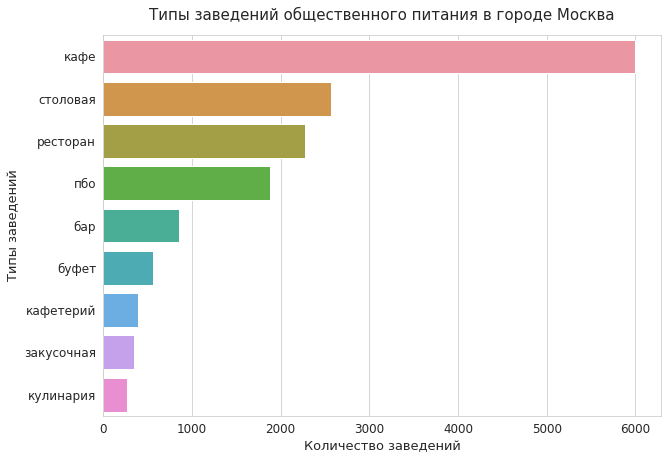

In [21]:
plt.figure(figsize=(10,7))   # строим столбчатый график
sns.barplot(x='total', y='type', data=group_types)
plt.ylabel('Типы заведений', fontsize=13)
plt.xlabel('Количество заведений', fontsize=13)
plt.title('Типы заведений общественного питания в городе Москва', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12)
plt.show()

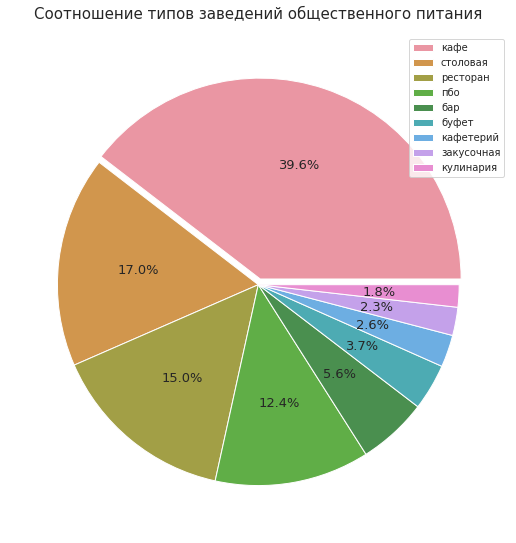

In [22]:
fig, ax = plt.subplots(figsize=(9,13))  # круговая диаграмма распределения
ax.pie(x=group_types['total'], 
       autopct='%.1f%%', 
       textprops={'fontsize':13, 'fontweight': 500}, 
       explode=(0.03,0,0,0,0,0,0,0,0), 
       colors=colors)
plt.legend(labels=group_types['type'], loc='best', fontsize=10)  # сколько билась, не выходит сдвинуть легенду еще правее
plt.title('Соотношение типов заведений общественного питания', fontsize=15, pad=15)
plt.show()

В городе находится всего 15141 заведений, из них почти 6 тысяч (39,5%) обозначены как кафе, после них с большим отрывом следуют столовые, рестораны и пбо. Кулинарий и закусочных представлено меньше всего.

С типами определились, посмотрим что как распределены посадочные места.

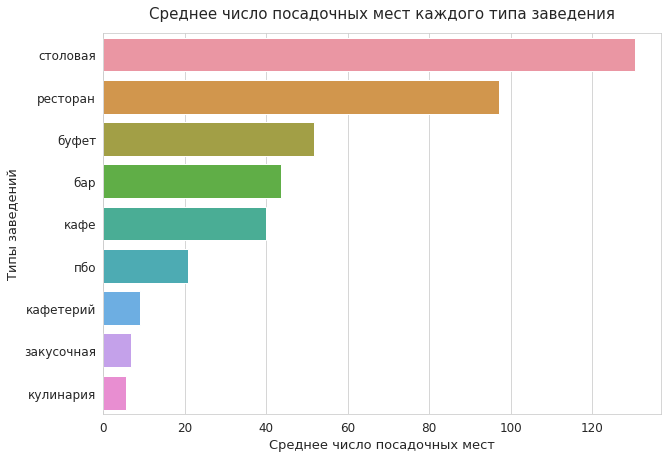

In [23]:
plt.figure(figsize=(10,7))  # столбчатый график среднего количества посадочных мест
sns.barplot(x='seats_mean', y='type', data=(group_types.sort_values(by='seats_mean', ascending=False)))
plt.ylabel('Типы заведений', fontsize=13)
plt.xlabel('Среднее число посадочных мест', fontsize=13)
plt.title('Среднее число посадочных мест каждого типа заведения', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12)
plt.show()

In [24]:
rest_data.describe()

,id,seats
count,15141.000000,15141.000000
mean,119396.013870,59.976091
std,72981.699228,75.040146
min,838.000000,0.000000
25%,28483.000000,14.000000
50%,144643.000000,40.000000
75%,183876.000000,80.000000
max,223439.000000,1700.000000


Самыми большими оказались столовые и рестораны, а вот популярные кафе предпочитают небольшую рассадку в 40 мест по медиане. Средний показатель посадки смещен относительно медианы вправо, на него сильно влияют показатели огромных заведений (1700 посадочных мест это почти что стадион в Тюмени).

### Характеристика сетевых и несетевых заведений

В таблице данных у нас есть указатель, принадлежит ли определенное заведение к сетевому или нет. Интересно посмотреть, отличаются ли показатели у этих групп.

In [25]:
chain_data = (rest_data   # группировка по сетям и типу заведения
              .groupby(['is_chain', 'type'], as_index=False)
              .agg(total=('name','count'), seats=('seats', 'mean'))
              .sort_values(by='is_chain')
              .sort_values(by='total', ascending=False)              
             )

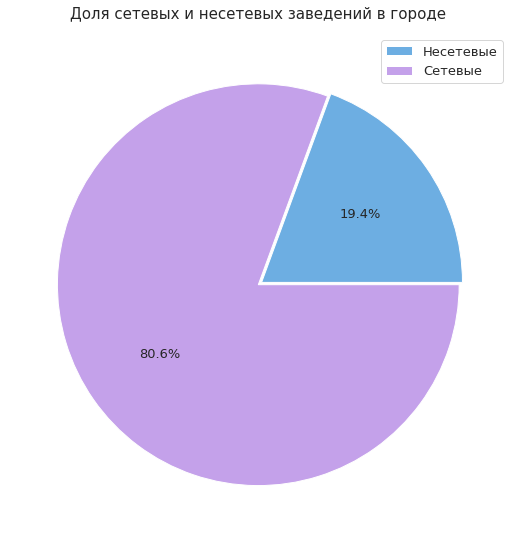

In [26]:
fig, ax = plt.subplots(figsize=(9,13))   # строим круговую диаграмму
ax.pie(x=(chain_data.groupby('is_chain')['total'].sum()), 
       autopct='%.1f%%', 
       textprops={'fontsize':13, 'fontweight': 500}, 
       explode=(0.02, 0),
       colors=colors[6:8])
plt.legend(labels=['Несетевые', 'Сетевые'], loc='upper right', fontsize=13)
plt.title('Доля сетевых и несетевых заведений в городе', fontsize=15, pad=15)
plt.show()

Как мы видим, подавляющее число заведений (80,6%) не относятся к сетям.

Одиночек много, но может, сетевое распространение предпочитают какие-то определенные типы заведений? Посчитаем соотношение в каждом типе и выведем на графике.

In [27]:
# соотношение сетевых заведений к несетевым в каждом типе

chain_ratio = chain_data[['is_chain', 'type', 'total']].pivot_table(index='type', columns='is_chain')
chain_ratio.columns = ['yes', 'no']
chain_ratio['ratio'] = round(chain_ratio['yes'] / (chain_ratio['yes'] + chain_ratio['no']) * 100, 2)
chain_ratio.sort_values(by='ratio', ascending=False, inplace=True)

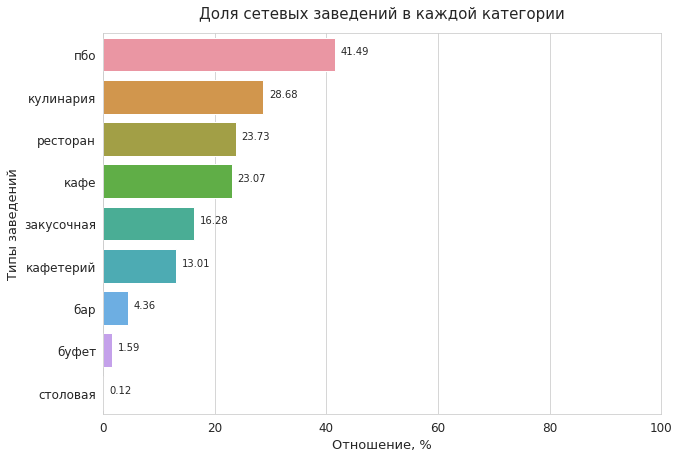

In [28]:
plt.figure(figsize=(10,7))   # количество заведений одного типа в сети и не в сети
sns.barplot(x='ratio', y=chain_ratio.index, data=chain_ratio)
plt.ylabel('Типы заведений', fontsize=13)
plt.xlabel('Отношение, %', fontsize=13)
plt.title('Доля сетевых заведений в каждой категории', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12)
plt.xlim(0,100)
for i, ratio in enumerate(chain_ratio.ratio):
    plt.text(ratio+1, i, ratio ,)
plt.show()

Оказывается, почти половина всех предприятий быстрого обслуживания (41,5%) существует в сетевом формате. Треть отделов кулинарии так же имеет формат сетевого заведения (честно говоря, ожидалось даже больше, так как сейчас многие гипермаркеты имеют отделы кулинарии и даже кафе на своей площади). Доля сетевых кафе составляет 23,1%.

###  Группировка и анализ посадочных мест

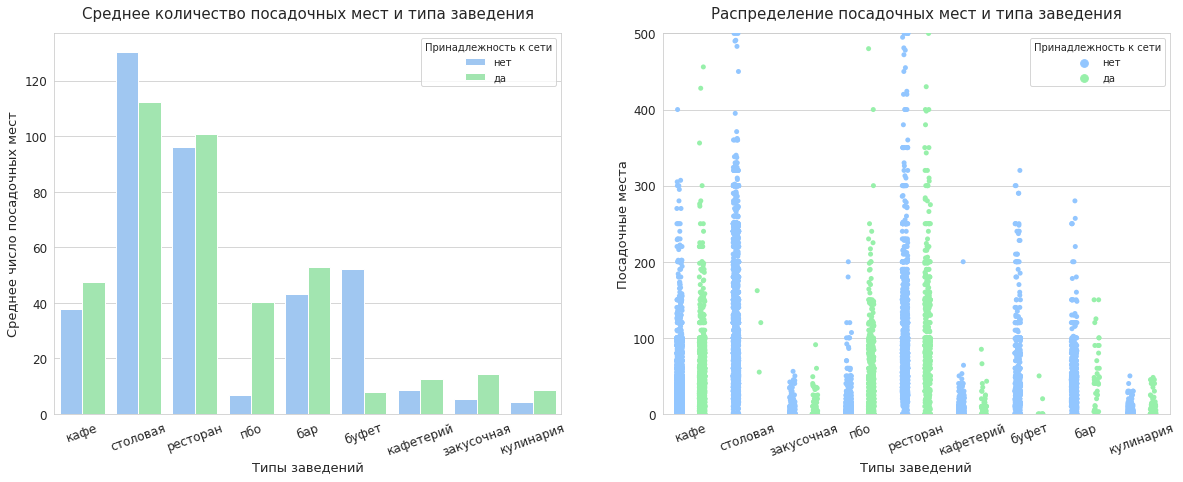

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.barplot(ax=axes[0], x='type', y='seats', data=chain_data, hue='is_chain')
axes[0].set_xlabel('Типы заведений', fontsize=13)
axes[0].set_ylabel('Среднее число посадочных мест', fontsize=13)
axes[0].set_title('Среднее количество посадочных мест и типа заведения', fontsize=15, pad=15)
axes[0].tick_params(axis='y', labelsize = 12)
axes[0].tick_params(axis='x', labelsize = 12, labelrotation = 20)
axes[0].legend(title='Принадлежность к сети')


sns.stripplot(ax=axes[1],x='type', y='seats', data=rest_data, hue='is_chain', dodge=True)
plt.xlabel('Типы заведений', fontsize=13)
plt.ylabel('Посадочные места', fontsize=13)
axes[1].set_title('Распределение посадочных мест и типа заведения', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12, labelrotation = 20)
plt.legend(title='Принадлежность к сети')
plt.ylim(0,500)  # ограничиваю ось, чтобы было лучше видно распределение
plt.show()

В сетевых ПБО количество посадочных мест обгоняет несетевые в несколько раз. В кафе, ресторанах и барах, входящим в сетевую структуру, объем посадки также больше. А вот в столовых, наоборот, больше мест в несетевых заведениях (сетевые ушли недалеко, но по диаграмме рассеяния видно, что их всего три штуки).
Вообще в абсолютных числах заметно распределение больших помещений и на 500 мест в ресторанах и столовых, и в кафе до 300, однако большая часть кафе находится в рамках 40-50 мест для посетителей (мы делаем акцент на кафе как на самую распространенную структуру).

#### Взаимосвязь размера сетевых предприятий и количества посадочных мест

Проверим, как соотносятся между собой две характеристики: принадлежность к сети заведений и количество посадочных мест. Для начала отфильтруем сетевые предприятия и составим диаграмму.

In [30]:
chain_group = (rest_data                     # фильтруем, группировка по названию, 
               .query('is_chain == "да"')    # считаем количество заведений в одной сети и среднее число посадочных мест
               .groupby('name', as_index=False)
               .agg({'id': 'count', 'seats': 'mean'})
               .rename(columns={'id': 'total'})
              )

Каждую сеть мы можем отнести к одной из четырех групп:
1. Небольшая сеть, мало посадочных мест
1. Небольшая сеть, много посадочных мест
1. Крупная сеть, много посадочных мест
1. Крупная сеть, мало посадочных мест

Но для начала нужно определить, что в нашем понимании объем сети, и какое количество мест считать большим или маленьким.

In [31]:
chain_group.describe()

,total,seats
count,576.000000,576.000000
mean,5.098958,59.067360
std,15.327915,54.593293
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,43.000000
75%,3.000000,83.297619
max,154.000000,306.000000


Как это ни странно, но медиана размера сети это всего 1 заведение! Посмотрим лучше 90 и 95 перцентили, а вот с местами все в целом понятно: максимальный показатель 306, медиана - 43, вполне логично будет принять эту величину за разделяющую наши данные на "много мест": "мало мест".

In [32]:
np.percentile(chain_group['total'], [90,95,99]) # 90, 95, 99 перцентили

array([ 8.  , 16.5 , 89.25])

Не более 90% сетей имеют 8 точек, и не более 95% сетей - 16 точек. 

Восемь кафе для Москвы - это еще небольшая сеть (в отличие от других городов), примем этот показатель за границу.

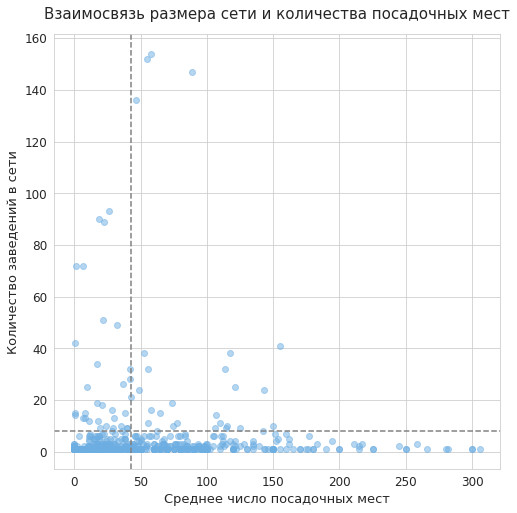

In [33]:
plt.figure(figsize=(8,8))   # строим диаграмму рассеяния
plt.scatter(x=chain_group['seats'], y=chain_group['total'], color=colors[-3], alpha=0.5)
plt.xlabel('Среднее число посадочных мест', fontsize=13)
plt.ylabel('Количество заведений в сети', fontsize=13)
plt.title('Взаимосвязь размера сети и количества посадочных мест', fontsize=15, pad=15)
plt.axvline(x=chain_group['seats'].median(), color='gray', linestyle='--')   # отмечаем границы
plt.axhline(y=(np.percentile(chain_group['total'], [90])[0]), color='gray', linestyle='--')
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12)
plt.show()

Диаграмма рассеяния наглядно демонстрирует нам, как распределились четыре группы: вероятность увидеть небольшое сетевое заведение с большим количеством посадочных мест наибольшая из всех. Однако для достоверности стоит еще посчитать...

In [34]:
def ratio_df(df):   # функция для распределения по группам
    t_max = np.percentile(chain_group['total'], [90])[0]
    s_max = 43     # пробовала здесь писать не число а код с расчетом перцентиля, функция ломается
    if df['total'] <= t_max and df['seats'] <= s_max:
        return 'Группа А'
    if df['total'] <= t_max and df['seats'] > s_max:
        return 'Группа Б'
    if df['total'] > t_max and df['seats'] <= s_max:
        return 'Группа В'
    return 'Группа Г'

In [35]:
ratio = chain_group.apply(ratio_df, axis=1)  # применяем функцию

ratio = (ratio    # сортируем по группам
         .reset_index()
         .rename(columns={'index': 'number', 0:'group'})
         .groupby('group', as_index=False)['number'].count()
        )
ratio['ratio'] = ratio['number'] / ratio['number'].sum() * 100  # считаем соотношение
ratio

,group,number,ratio
0,Группа А,257,44.618056
1,Группа Б,262,45.486111
2,Группа В,32,5.555556
3,Группа Г,25,4.340278


Итак, кода много, а вывод можем сделать такой: **из всех сетевых заведений общественного питания мы с большей вероятностью встретим или кафе из маленькой сети с большой посадкой**, или же предприятие из маленькой сети, но с малым количеством мест.

###  Определение улицы заведения

In [36]:
variants = ['улица', 'переулок', 'шоссе', 'набережная', 'проспект', 'проезд', 'шоссе', 'ульвар', 'площадь', 'аллея', 
            'линия', 'микрорайон', 'квартал']   # выделили все возможные варианты адреса 

def get_street(address):   #  функция для выделения улицы
    for part in address.split(', '):
        for var in variants:
            if part.find(var)!= -1:
                return part


In [37]:
rest_data['street'] = rest_data['address'].apply(get_street)  # применяем
rest_data[(rest_data['street'].isna())]  # проверяем пропуски и какие они

,id,name,is_chain,type,address,seats,street
1400,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1401,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1402,20105,кафе «граф монте-кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1403,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None
1404,150537,кафе «вечный зов»,нет,кафе,"город Москва, город Зеленоград, корпус 834А",30,None
...,...,...,...,...,...,...,...
14787,216942,шашлычный дворик,нет,кафе,"город Москва, поселение Десеновское, деревня Ватутинки, владение 10",15,None
14788,216926,кафе «сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня Ватутинки, владение 15",10,None
14801,208239,газпромнефть,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владение 1",20,None
14921,209920,дюшес,да,ресторан,"город Москва, город Зеленоград, Проезд № 4806, дом 3",100,None


*Сегодня лишь узнала, что в Зеленограде, оказывается, нет улиц...* Некоторым заведениям улиц не присвоилось, потому что они находятся в деревне или селе, которые находятся в поселении где-то за МКАДом, таких набралось 333 штук, предлагаю для дальнейших расчетов их не учитывать.

In [38]:
rest_data_str = rest_data.dropna() # убираем пропуски
rest_data_str.info() # смотрим что вышло

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14808 entries, 0 to 15140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14808 non-null  int64 
 1   name      14808 non-null  object
 2   is_chain  14808 non-null  object
 3   type      14808 non-null  object
 4   address   14808 non-null  object
 5   seats     14808 non-null  int64 
 6   street    14808 non-null  object
dtypes: int64(2), object(5)
memory usage: 925.5+ KB


### Топ-10 улиц по количеству объектов общественного питания

In [39]:
top_streets = (rest_data_str   # топ-10 улиц
               .groupby('street', as_index=False)['name'].count()
               .sort_values(by='name',ascending=False)
               .reset_index(drop=True)
               .head(10)
              )
top_streets.columns = ['street', 'count']
top_streets     

,street,count
0,проспект Мира,196
1,Профсоюзная улица,180
2,Ленинградский проспект,171
3,Пресненская набережная,165
4,Варшавское шоссе,163
5,Ленинский проспект,148
6,проспект Вернадского,126
7,Кутузовский проспект,112
8,Каширское шоссе,110
9,Кировоградская улица,106


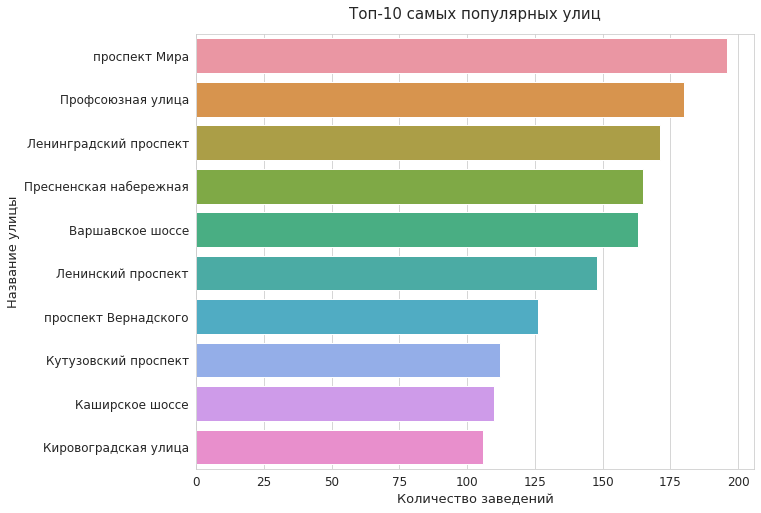

In [40]:
plt.figure(figsize=(10,8))   # строим столбчатый график
sns.barplot(x='count', y='street', data=top_streets)
plt.xlabel('Количество заведений', fontsize=13)
plt.ylabel('Название улицы', fontsize=13)
plt.title('Топ-10 самых популярных улиц', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12)
plt.show()

In [41]:
top_district = top_streets.merge(district, on='street') # объединяем с внешней информацией о районах

In [42]:
top = top_streets['street'].to_list() # список топ-улиц
for street in top:   # выводим в каких районах находятся наши улицы
    print(f'{street} находится в:')
    dist = []
    div = []
    for x,y in top_district.iterrows():
        if y['street'] == street:
            dist.append(y['district'])
            if y['divisions'] not in div:
                div.append(y['divisions'])
    for i in dist:
        print('-', i)
    print(f'Всего {len(dist)} районов')
    print('Округа:', ", ".join(div))
    print(' ')

проспект Мира находится в:
- Алексеевский район
- Ярославский Район
- Район Марьина роща
- Останкинский район
- Район Ростокино
- Район Свиблово
- Мещанский район
Всего 7 районов
Округа: СВАО, ЦАО
 
Профсоюзная улица находится в:
- Академический район
- Район Черемушки
- Район Ясенево
- Район Коньково
- Обручевский район
- Район Теплый Стан
Всего 6 районов
Округа: ЮЗАО
 
Ленинградский проспект находится в:
- Район Аэропорт
- Район Беговой
- Хорошевский район
- Район Сокол
Всего 4 районов
Округа: САО
 
Пресненская набережная находится в:
- Пресненский район
Всего 1 районов
Округа: ЦАО
 
Варшавское шоссе находится в:
- Район Чертаново Центральное
- Район Чертаново Северное
- Район Чертаново Южное
- Донской район
- Район Нагатино-Садовники
- Нагорный район
- Район Северное Бутово
- Район Южное Бутово
Всего 8 районов
Округа: ЮАО, ЮЗАО
 
Ленинский проспект находится в:
- Район Проспект Вернадского
- Район Тропарево-Никулино
- Донской район
- Район Гагаринский
- Ломоносовский район
- Обручев

Ленинский проспект, кажется, в любом городе России чаще всего займет первую строчку по протяженности: так оно вышло и здесь (протяженность 14 км через четыре административных округа). Пресненская набережная представляет интерес: из топ-10 она самая миниатюрная, находится в ЦАО в одном районе и прямо изобилует разнообразием предприятий *чуть позже я узнала, что она находится в Москва-сити, так что неудивительно*

In [43]:
(top_district    # сводная таблица по числу районов и округов, по которым проходит каждая улица
 .groupby(['street', 'divisions'])
 .agg({'district': 'nunique', 
       'count': 'first'})
 .sort_values(by='count', ascending=False)
)

district  count
street                 divisions                 
проспект Мира          СВАО              6    196
                       ЦАО               1    196
Профсоюзная улица      ЮЗАО              6    180
Ленинградский проспект САО               4    171
Пресненская набережная ЦАО               1    165
Варшавское шоссе       ЮАО               6    163
                       ЮЗАО              2    163
Ленинский проспект     ЗАО               2    148
                       ЦАО               1    148
                       ЮАО               1    148
                       ЮЗАО              4    148
проспект Вернадского   ЗАО               3    126
                       ЮЗАО              2    126
Кутузовский проспект   ЗАО               2    112
Каширское шоссе        ЮАО               4    110
Кировоградская улица   ЮАО               3    106

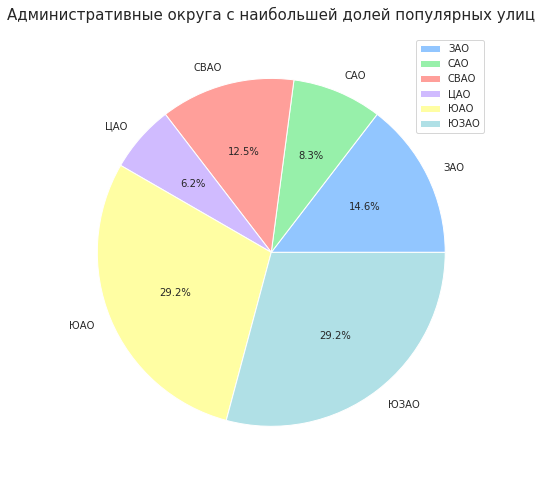

In [44]:
pie_d = (top_district  # доли административных округов по наличию в них популярных улиц
 .pivot_table(index=['divisions'], values=['street'], aggfunc='count').reset_index()
)

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=pie_d['street'], labels=pie_d['divisions'], autopct='%.1f%%')
plt.title('Административные округа с наибольшей долей популярных улиц', fontsize=15, pad=15)
plt.legend()
plt.show()

Самыми популярными и насыщенными на рестораны оказались Южный и Юго-Западный административные округа, а вот Центральный этот список замыкает. *может там много административных зданий и не до кафе вовсе?*

Стоит проверить, есть ли какие-то тенденции по типам заведений в популярных улицах, или они примерно соответствуют основной выборке?

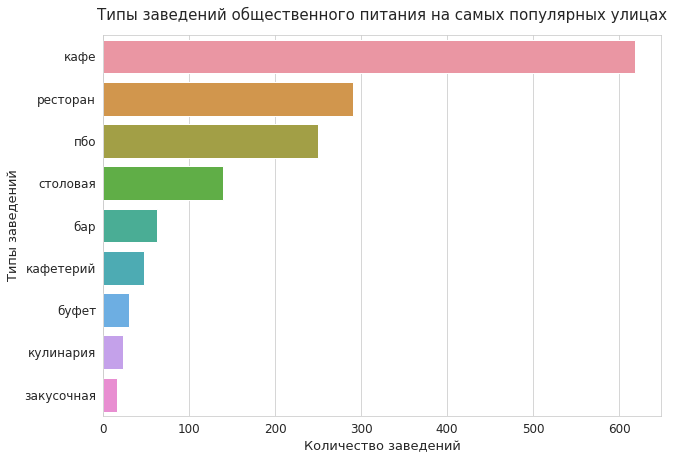

In [45]:
top_streets_plot = (rest_data_str  # фильтруем дф по популярным улицам
                    .query('street in @top')
                    .groupby('type', as_index=False)['id'].count()
                    .sort_values(by='id', ascending=False)
                   )

plt.figure(figsize=(10,7))   # строим столбчатый график
sns.barplot(x='id', y='type', data=top_streets_plot)
plt.ylabel('Типы заведений', fontsize=13)
plt.xlabel('Количество заведений', fontsize=13)
plt.title('Типы заведений общественного питания на самых популярных улицах', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12)
plt.show()

Кафе продолжает преобладать над всеми типами заведений, но теперь в тройку вырвались еще и фастфуд-предприятия.

### Самые непопулярные улицы города

In [46]:
one_streets = (rest_data_str  # улицы с одним заведением
               .groupby('street', as_index=False)['name'].count()
               .sort_values(by='name',ascending=True)
               .reset_index(drop=True)
               .query('name == 1')
               .rename(columns={'name': 'count'})
              )
one_streets     

,street,count
0,Перовский проезд,1
1,переулок Васнецова,1
2,Ижорский проезд,1
3,Изваринская улица,1
4,Известковый переулок,1
...,...,...
540,1-й Сетуньский проезд,1
541,1-й Сельскохозяйственный проезд,1
542,Большой Афанасьевский переулок,1
543,Богоявленский переулок,1


Всего 545 улиц с одним заведением на ней. 

In [47]:
one_streets = one_streets.merge(district, on='street') # добавляем информацию о районах

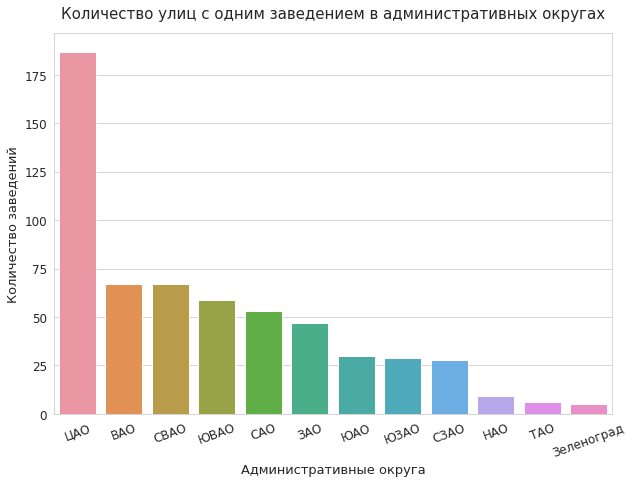

In [48]:
one_streets_plot = (one_streets   # группируем информацию для графика по округу и количеству одиноких улиц
                    .groupby(['divisions'], as_index=False)
                    .agg({'street': 'count'})
                    .sort_values(by='street', ascending=False)
                   )

plt.figure(figsize=(10,7))
sns.barplot(x='divisions', y='street', data=one_streets_plot)
plt.xlabel('Административные округа', fontsize=13)
plt.ylabel('Количество заведений', fontsize=13)
plt.title('Количество улиц с одним заведением в административных округах', fontsize=15, pad=15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', labelsize = 12, labelrotation = 20)
plt.show()

In [49]:
one_streets.groupby(['divisions','district'])['street'].count().sort_values(ascending=False).head(20)

divisions  district            
ЦАО        Басманный район         26
           Таганский район         26
           Район Хамовники         26
           Тверской район          21
           Пресненский район       20
СВАО       Район Марьина роща      18
ЦАО        Район Арбат             18
           Мещанский район         16
           Район Замоскворечье     14
ЮВАО       Район Лефортово         12
ЮАО        Даниловский район       12
ВАО        Район Соколиная Гора    12
ЦАО        Район Якиманка          11
ВАО        Район Сокольники        11
           Район Богородское       10
ЗАО        Район Внуково            9
ЮЗАО       Район Южное Бутово       9
ЮВАО       Нижегородский район      9
ЦАО        Красносельский район     9
САО        Район Аэропорт           8
Name: street, dtype: int64

Больше всего одиноких улиц в районах Басманный, Таганский, Пресненский и Хамовники.

Конечно, сложно судить человеку не из Москвы и без привязки местоположения каждого предприятия на карте, однако **в Центральном округе находится больше всего улиц с одним заведением**, а самые популярные районы, Южный и Юго-Западный, на этом графике почти замыкают список. Думаю, здесь еще не хватает информации, какая конкретно протяженность у этих улиц, быть может они совсем небольшие, тогда как популярные проспекты пересекают чуть ли не половину Москвы и ожидаемо имеют больше заведений.

## Выводы

Подведем итоги работы и составим общие рекомендации о виде заведения, количестве посадочных мест, предполагаемом районе расположения, а также оценим возможность развития сети.

1. Изучив предоставленные данные, мы обнаружили, что **наибольшее количество объектов общественного питания составляют кафе с большим отрывом (39,6%)**, затем столовые и рестораны (17%  и 15% соответственно). 
2. **Доля сетевых заведений невелика** и составляет всего 19,4% от общего числа. В сетевых предприятиях довольно популярны предприятия общественного питания, кафе и рестораны.
3. После анализа распределения среднего числа посадочных мест, можно сказать, что **для сетевых заведений чаще всего характерно наличие малого числа точек с большой рассадкой** (в нашем случае это от 40 мест и больше). В Москве преобладают небольшие сети: не больше 90% предприятий имеют больше 8 заведений.
4. Столовые среди всех типов предприятий имеют самую большую посадку (130 мест), кафе - в среднем сорок мест. У предприятий общественного питания есть большая разница между сетевыми и несетевыми: первые в среднем имеют небольшое помещение и посадочные места, а вот вторые чаще работают навынос.
5. **Самые популярные улицы по количеству заведений:**
    * проспект Мира
    * Профсоюзная улица
    * Ленинградский проспект
    * Пресненская набережная
    * Варшавское шоссе
    * Ленинский проспект
    * проспект Вернандского
    * Кутузовский проспект
    * Каширское шоссе
    * Кировоградская улица
    
    Почти все они имеют большую протяженность и пересекают несколько районов Москвы. **Южный и Юго-Западный административные округа имеют больше всего заведений.**
6. Есть улицы, на которых расположилось всего одного заведение общественного питания: таких мы обнаружили **545** штук. Примечательно, что большая часть из них находится в Центральном административном округе, сердце Москвы.

Что касается рекомендаций, то они будут лишь *общего характера*, так как у нас нет информации об ожидаемом объеме инвестирования, нет бизнес-плана и стратегии развития будущего бизнеса. Можно лишь отметить, что самым удобным форматом заведения будет скорее всего **кафе или предприятие быстрого обслуживания**, нет смысла гнаться за большим помещением и огромной рассадкой, лучше сконцентрироваться на средних показателях в 30 мест; так как гостей должны обслуживать роботы, формат ресторана для этого подходит мало. Хорошим выбором будет ориентироваться на столовую, гостям будет интересен процесс обслуживания, организовать процесс роботизированной выдачи будет проще (но это уже нюансы работы самих роботов, нам они неизвестны). 

Если будущий бизнес ориентируется на высокий чек, то вариант с кафе предпочтительнее: это будет своего рода небольшой перфоманс в центре города. Для подобных оценок как раз бы пригодился бизнес-план.

Что касается месторасположения, то оно **сильно зависит от возможностей аренды или покупки помещения, а значит и от финансирования**. Мы не знаем никаких примерных цифр, поэтому в равной степени можно предложить и центр города, и варианты поотдаленнее. Если же мыслить гипотетически, то было бы интересным вариантом выбрать **Центральный административный округ**, в нем есть множество улиц с всего одним предприятием, а с учетом уникальной идеи стартапа конкурентов будет немного. К тому же это будет недалеко находиться от главных туристических маршрутов, возможно такой вариант как раз привлек бы туристов. Располагаться в глубине района или во дворах скорее всего не рассматривается, поэтому неплохим выбором станет **Пресненская набережная (наверно, самый престижный вариант), проспект Мира.**

Если бизнес рассчитывает на сетевую модель развития, то есть смысл начинать не с центра, а издалека, например с **Ленинградского проспекта в Северном округе и недалеко от него**. 

В любом случае, более глубокие рекомендации, как уже было сказано, сильно зависят от ожиданий бизнеса, его плана развития, определения точки окупаемости, уровня финансирования и концепции в целом.